In [5]:
# import numpy as np
# import matplotlib.pyplot as plt
# class DiscreteSignal:
#     def __init__(self,values=None):
#         self.values=np.array(values,dtype=float) if values is not None else np.array([],dtype=float)
    
#     def set_value_at_time(self,time,value):
#         if time>=len(self.values) or time<0:
#             extend_size=max(0,time+1-len(self.values))
#             self.values=np.append(self.values,np.zeros(extend_size,dtype=float))
#         self.values[time]=value
        
#     def shift_signal(self,shift):
#         shift=int(shift)
#         if shift<0:
#             return DiscreteSignal(np.append(np.zeros(-shift,dtype=float),self.values))
#         elif shift>0:
#             return DiscreteSignal(self.values[shift:])
#         else:
#             return DiscreteSignal(self.values.copy())
        
#     def add(self,other):
#         max_length=max(len(self.values),len(other.values))
#         extended_self=np.append(self.values,np.zeros(max_length-len(self.values),dtype=float))
#         extended_other=np.append(other.values,np.zeros(max_length-len(other.values),dtype=float))
#         return DiscreteSignal(extended_self+extended_other)
    
#     def multiply(self,other):
#         max_length=max(len(self.values),len(other.values))
#         extended_self=np.append(self.values,np.zeros(max_length-len(self.values),dtype=float))
#         extended_other=np.append(other.values,np.zeros(max_length-len(other.values),dtype=float))
#         return DiscreteSignal(extended_self*extended_other)
    
#     def multiply_const_factor(self,scaler):
#         return DiscreteSignal(self.values*scaler)
    
#     def plot(self):
#         plt.stem(range(len(self.values)), self.values)
#         plt.title('Discrete Signal Plot')
#         plt.xlabel('Time Index')
#         plt.ylabel('Signal Value')
#         plt.grid(True)
#         plt.show()


# class ContinuousSignal:
#     def __init__(self,func):
#         self.func=func
        
#     def shift(self,shift):
#         return ContinuousSignal(lambda t: self.func(t-shift))
    
#     def add(self,other):
#         return ContinuousSignal(lambda t: self.func(t)+other.func(t))
#     def multiply(self,other):
#         return ContinuousSignal(lambda t: self.func(t)*other.func(t))
#     def multiply_const_factor(self,scaler):
#         return ContinuousSignal(lambda t: self.func(t)*scaler)
    
#     def plot(self,t_range):
#         t = np.linspace(t_range[0], t_range[1], 400)
#         plt.plot(t, self.func(t))
#         plt.title('Continuous Signal Plot')
#         plt.xlabel('Time')
#         plt.ylabel('Signal Value')
#         plt.grid(True)
#         plt.show()
        
        
# class LTIDiscrete:
#     def __init__(self, impulse_response):
#         self.impulse_response = impulse_response

#     def linear_combination_of_impulses(self, input_signal):
#         impulses = [input_signal.multiply_const_factor(input_signal.values[i]) if input_signal.values[i] != 0 else None for i in range(len(input_signal.values))]
#         impulses = [imp for imp in impulses if imp is not None]
#         coefficients = [input_signal.values[i] for i in range(len(input_signal.values)) if input_signal.values[i] != 0]
#         return impulses, coefficients

#     def output(self, input_signal):
#         impulses, coefficients = self.linear_combination_of_impulses(input_signal)
#         output_signal = DiscreteSignal()
#         for imp, coeff in zip(impulses, coefficients):
#             shifted_impulse_response = self.impulse_response.shift_signal(-int(coeff))
#             output_signal = output_signal.add(shifted_impulse_response.multiply_const_factor(coeff))
#         return output_signal

        
        
        
        
        
        
        
# class LTIContinuous:
#     def __init__(self,impulse_response):
#         self.impulse_response=impulse_response
        
#     def linear_combination_of_impulses(self,input_signal,delta):
#         t_values=np.arange(-INF,INF,delta)
#         impulses=[input_signal.multiply_const_factor(1/delta) if input_signal.func(t)!=0 else None for t in t_values]
#         impulses=[imp for imp in impulses if imp is not None]
#         coefficients=[input_signal.func(t) for t in t_values if input_signal.func(t)!=0]
#         return impulses,coefficients
    
    
#     def output_approx(self,input_signal,delta):
#         impulses,coefficients=self.linear_combination_of_impulses(input_signal,delta)
#         output_signal=ContinuousSignal(lambda t: 0)
#         for imp,coeff in zip(impulses,coefficients):
#             shifted_impulse_response = self.impulse_response.shift(-coeff)
#             output_signal=output_signal.add(shifted_impulse_response.multiply_const_factor(coeff))
#         return output_signal





import numpy as np
import matplotlib.pyplot as plt
class DiscreteSignal:
    def __init__(self,INF):
        self.INF = INF
        self.values=np.zeros(2*INF+1)
    def set_value_at_time(self,time,value):
        if -self.INF<=time<=self.INF:
            self.values[time+self.INF]=value
        else:
            raise ValueError("Index out of range")
        
    def shift_signal(self,shift):
        shifted_signal=DiscreteSignal(self.INF)
        for i in range(-self.INF,self.INF+1):
            shifted_index=i-shift
            if -self.INF<=shifted_index<=self.INF:
                shifted_signal.set_value_at_time(i,self.values[shifted_index+self.INF])
        return shifted_signal
    
    def add(self,other):
        if self.INF!=other.INF:
            raise ValueError("INF values do not match")
        new_signal=DiscreteSignal(self.INF)
        new_signal.values=self.values+other.values
        return new_signal
    def multiply(self,other):
        if self.INF!=other.INF:
            raise ValueError("INF values do not match")
        new_signal=DiscreteSignal(self.INF)
        new_signal.values=self.values*other.values
        return new_signal
    
    def multiply_const_factor(self,scaler):
        new_signal=DiscreteSignal(self.INF)
        new_signal.values=self.values*scaler
        return new_signal
    
    def plot(self):
        time = np.arange(-self.INF, self.INF+1)
        plt.stem(time, self.values)
        plt.xlabel('Time index (n)')
        plt.ylabel('Signal value')
        plt.title('Discrete Signal')
        plt.grid(True)
        plt.show()
        
    


import numpy as np
import matplotlib.pyplot as plt
class ContinuousSignal:
    def __init__(self,func):
        self.func=func
    
    def shift(self,shift):
        return ContinuousSignal(lambda t:self.func(t-shift))
    
    def add(self,other):
        return ContinuousSignal(lambda t:self.func(t)+other.func(t))
    
    def multiply(self,other):
        return ContinuousSignal(lambda t:self.func(t)*other.func(t))
    
    def multiply_const_factor(self,scaler):
        return ContinuousSignal(lambda t:self.func(t)*scaler)
    
    def plot(self,t_range=(-10,10),numpoints=1000,title="Continuous Signal"):
        t = np.linspace(t_range[0], t_range[1], numpoints)
        y_values = self.func(t)
        plt.plot(t, y_values)
        plt.xlabel('Time (t)')
        plt.ylabel('Signal x(t)')
        plt.title(title)
        plt.grid(True)
        plt.show()



import numpy as np

class LTI_Discrete:
    def __init__(self, impulse_response):
        """
        Initializes the LTI Discrete system with a given impulse response.
        
        :param impulse_response: An instance of DiscreteSignal representing the system's impulse response.
        """
        self.impulse_response = impulse_response

    def linear_combination_of_impulses(self, input_signal):
        """
        Decomposes the input signal into a linear combination of unit impulses.
        
        :param input_signal: The input discrete signal.
        :return: The unit impulses and their coefficients.
        """
        impulses = []
        coefficients = []
        for i, value in enumerate(input_signal.values):
            if value != 0:
                shift=i-self.impulse_response.INF
                # unit_impulse=DiscreteSignal(input_signal.INF)
                # unit_impulse.set_value_at_time(0,1)
                # impulses.append(self.unit_impulse.shift_signal(shift))
                #impulses.append(i)
                impulses.append(self.impulse_response.shift_signal(shift))
                coefficients.append(value)
        return impulses, coefficients

    def output(self, input_signal):
        """
        Finds the output of the LTI system using its impulse response and input signal.
        
        :param input_signal: The input discrete signal.
        :return: The output discrete signal.
        """
        # impulses, coefficients = self.linear_combination_of_impulses(input_signal)
        # output_signal = DiscreteSignal(self.impulse_response.INF)#np.zeros_like(input_signal.values)
        # for i, coeff in zip(impulses, coefficients):
        #     shifted_impulse_response = shifted_impulse_response.shift_signal(i)
        #     output_signal += coeff * shifted_impulse_response
        # return output_signal
        
        output_signal = DiscreteSignal(self.impulse_response.INF)
        impulses, coefficients = self.linear_combination_of_impulses(input_signal)
        for impulse, coeff in zip(impulses, coefficients):
            scaled_impulse = impulse.multiply_const_factor(coeff)
            output_signal = output_signal.add(scaled_impulse)
        return output_signal


        
        
    
import numpy as np

class LTI_Continuous:
    def __init__(self, impulse_response):
        """
        Initializes the LTI Continuous system with a given continuous-time impulse response.
        
        :param impulse_response: An instance of ContinuousSignal representing the system's impulse response.
        """
        self.impulse_response = impulse_response

    def linear_combination_of_impulses(self, input_signal, delta):
        """
        Decomposes the input continuous signal into a linear combination of impulses of width delta.
        
        :param input_signal: The input continuous signal.
        :param delta: The width of each impulse.
        :return: The impulses and their coefficients.
        """
        t_values = np.arange(-10, 10, delta)  # Sample time values
        coefficient = np.zeros_like(t_values)
        for i, t in enumerate(t_values):
            coefficient[i] = input_signal.func(t) * delta
        return t_values, coefficient

    def output_approx(self, input_signal, delta):
        """
        Approximates the output of the system by first decomposing the input, then using the impulse response.
        
        :param input_signal: The input continuous signal.
        :param delta: The width of the impulses.
        :return: The approximated output continuous signal.
        """
        output_responses = []
        t_values, coefficients = self.linear_combination_of_impulses(input_signal, delta)
        output_signal = np.zeros_like(t_values)
        for i, coeff in enumerate(coefficients):
            shifted_impulse_response = self.impulse_response.func(t_values - t_values[i])
            output_responses.append(coeff*shifted_impulse_response)
            output_signal += coeff * shifted_impulse_response
        return output_signal,output_responses
    
    

    
    

    
    


<>:32: SyntaxWarning: invalid escape sequence '\d'
<>:32: SyntaxWarning: invalid escape sequence '\d'
/var/folders/zh/0p6yf5hj3kz0f5_st2ym0wr80000gn/T/ipykernel_68619/2565353562.py:32: SyntaxWarning: invalid escape sequence '\d'
  axes[i].set_title(f'$\delta[n - {i-5}]x[{coeff}]$')


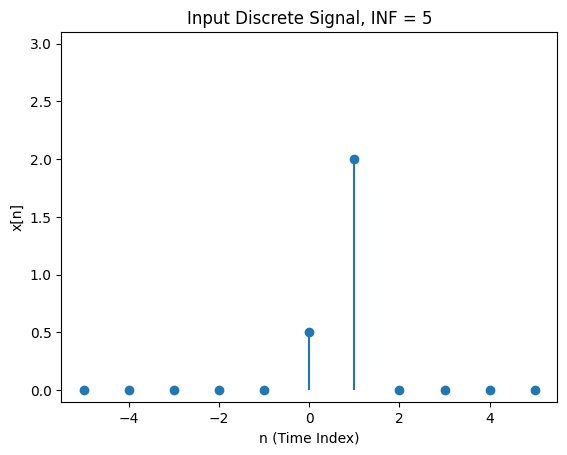

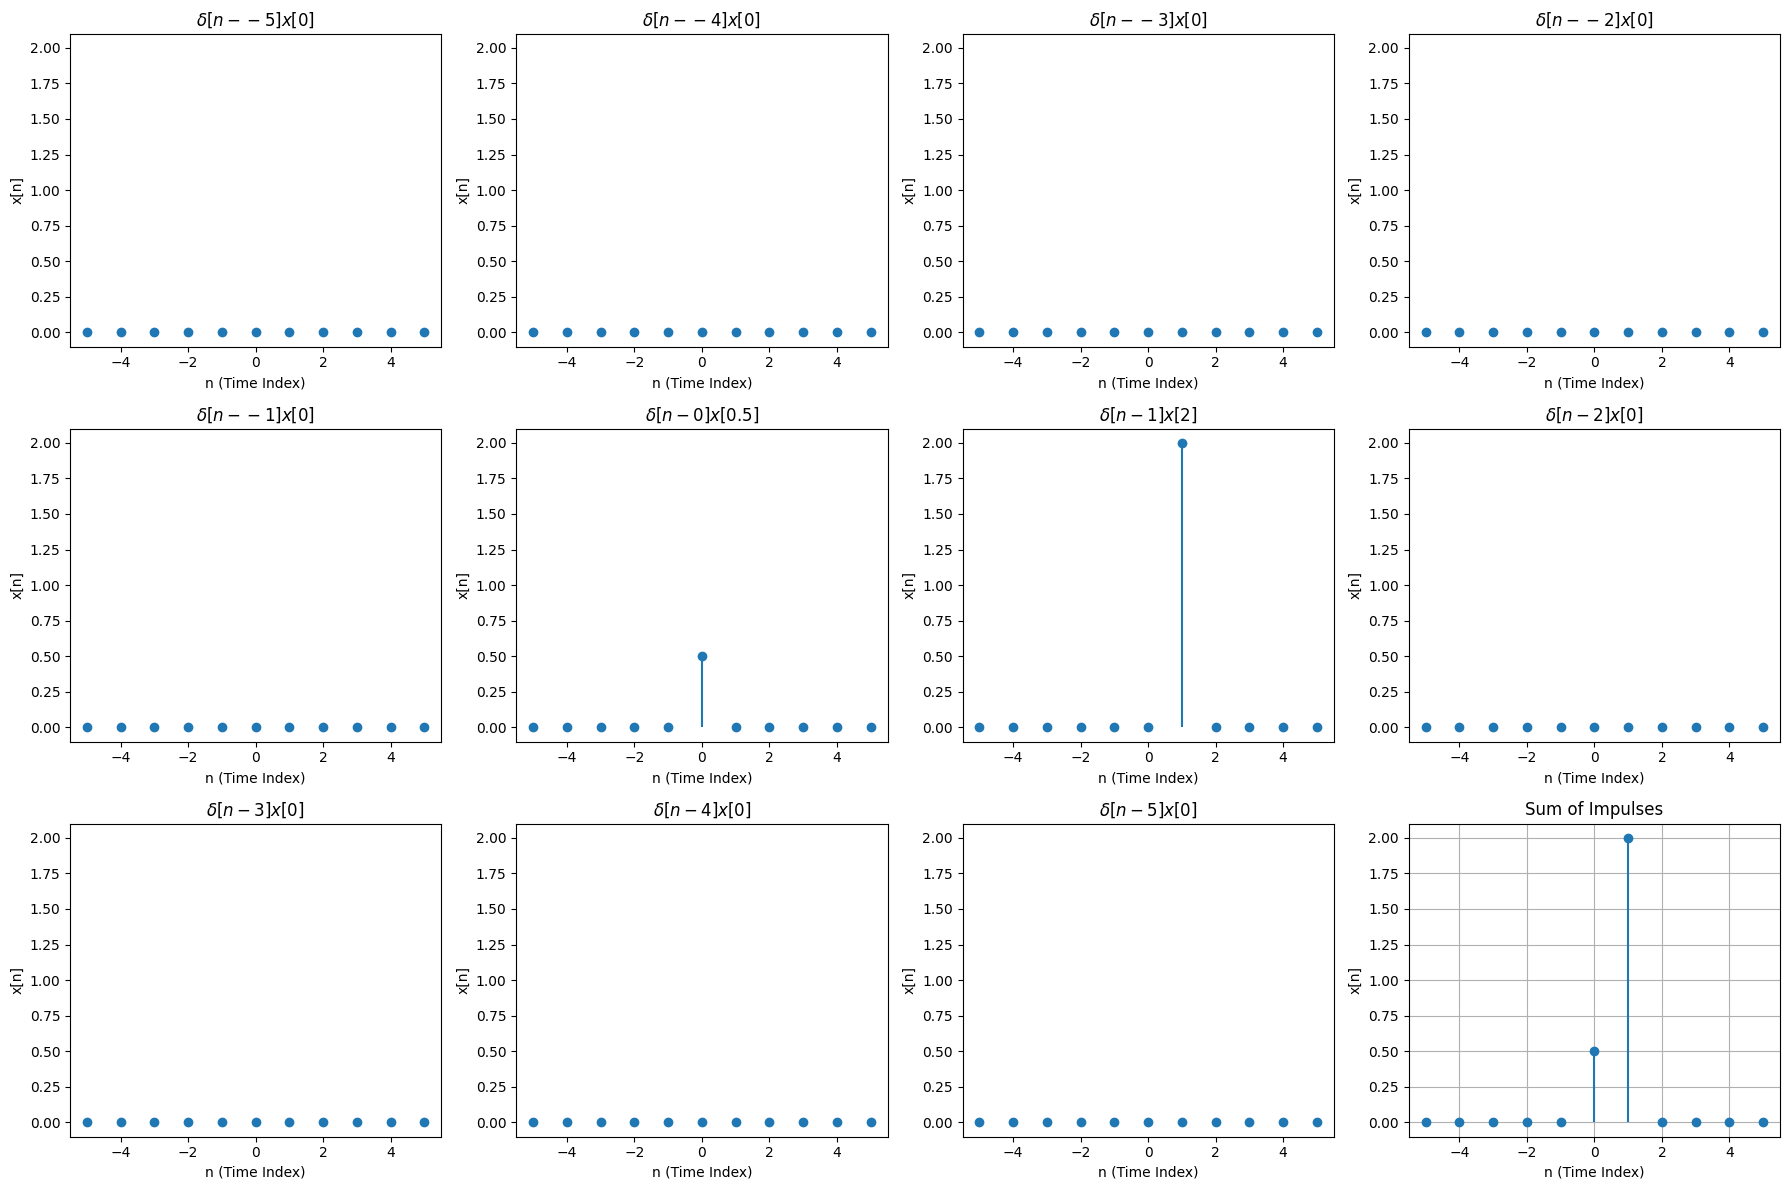

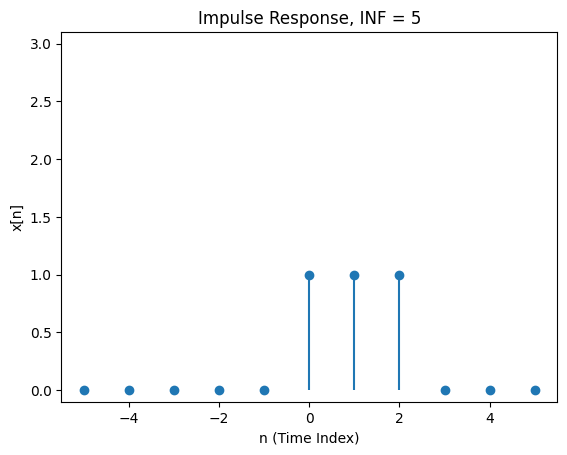

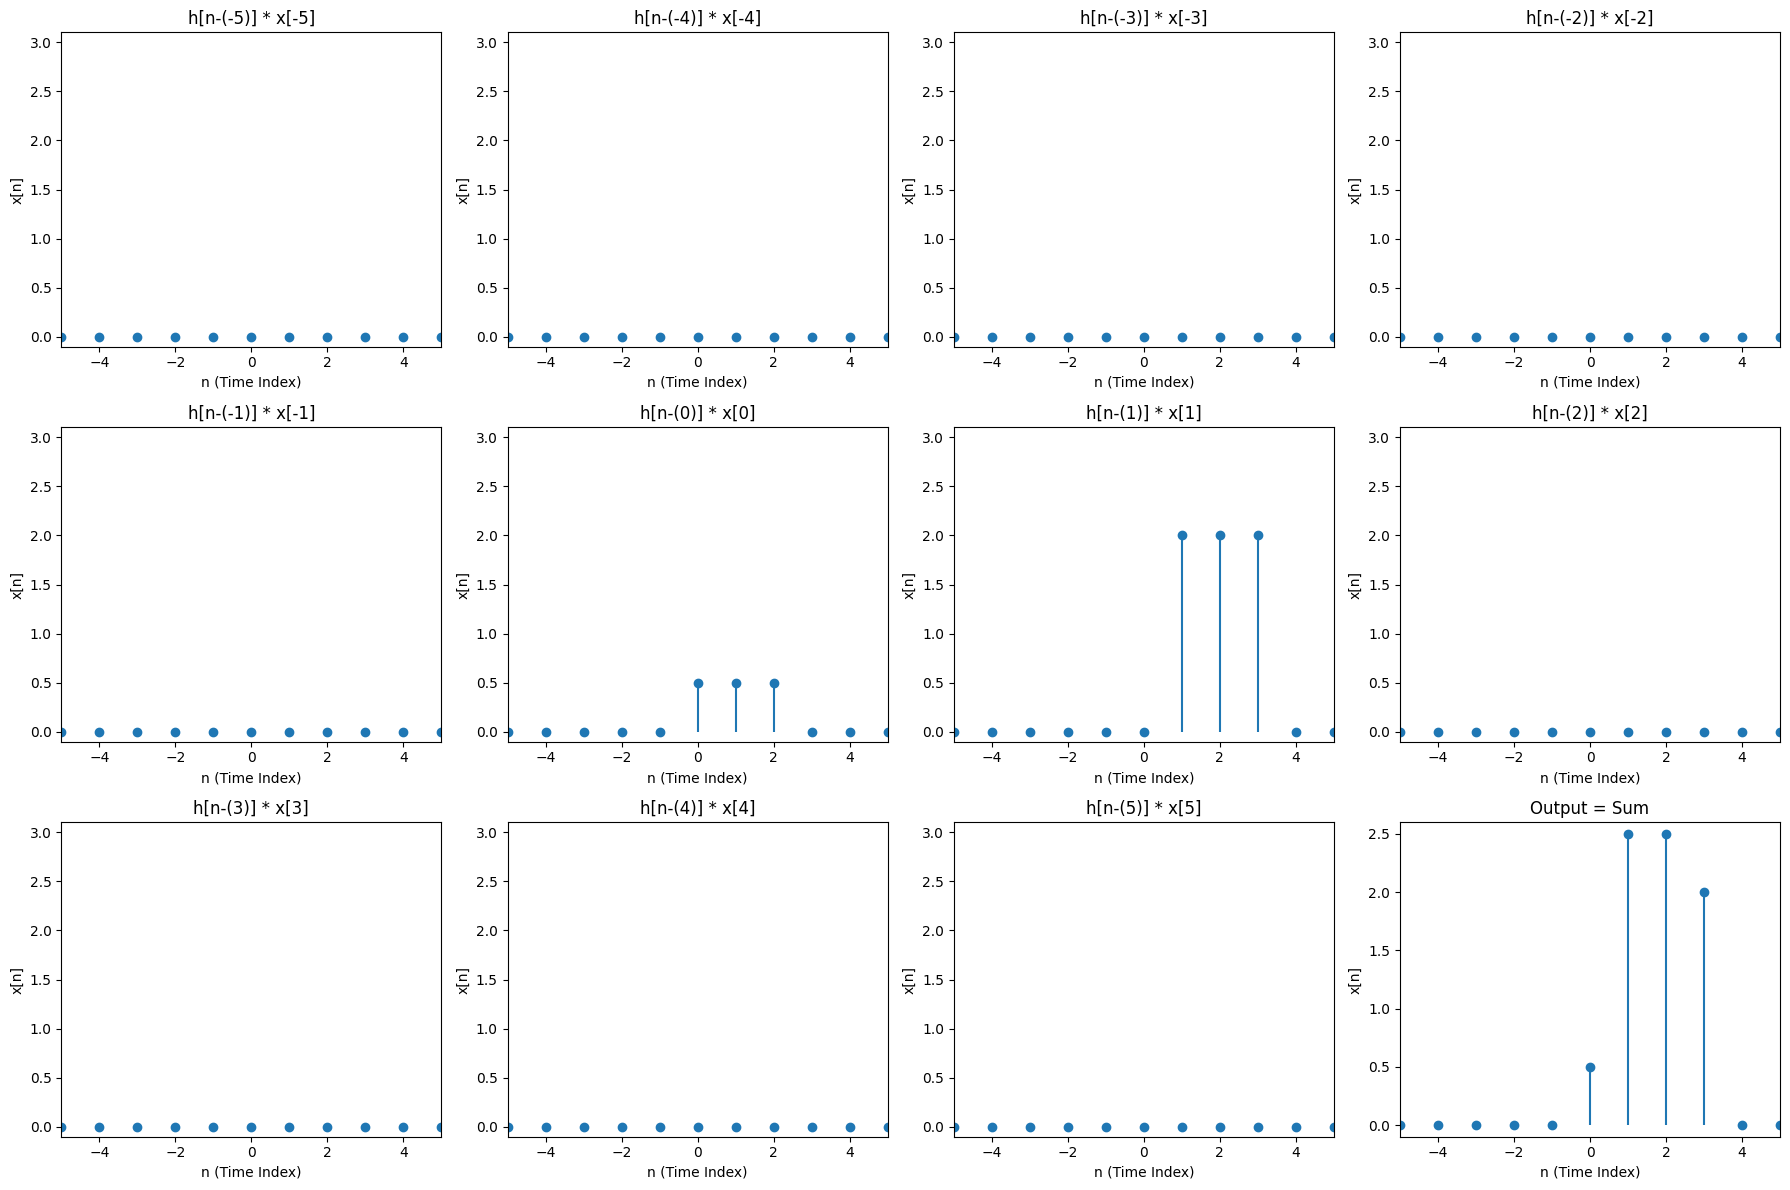

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#Here INF==5
INF=5
class DiscreteSignal:
    def __init__(self, values):
        self.values = np.array(values)
    
    def plot(self, title, ax=None, filename=None, show=True):
        if ax is None:
            fig, ax = plt.subplots()
        ax.stem(range(-5, len(self.values) - 5), self.values, basefmt=" ")
        ax.set_title(title)
        ax.set_xlabel('n (Time Index)')
        ax.set_ylabel('x[n]')
        ax.set_ylim([-0.1, 3.1])  # Adjust y-axis limits to match the scale of examples
        if filename:
            plt.savefig(filename)
        if show:
            plt.grid(True)
            plt.show()

def plot_impulses_with_coefficients(signal, coefficients):
    fig, axes = plt.subplots(3, 4, figsize=(18, 12))  # Grid size adjusted for 12 subplots
    axes = axes.flatten()
    combined_signal = np.zeros_like(signal)
    for i, coeff in enumerate(coefficients):
        impulse = np.zeros_like(signal)
        impulse[i] = coeff
        combined_signal += impulse
        axes[i].stem(range(-5, len(signal) - 5), impulse, basefmt=" ", linefmt='C0-', markerfmt='C0o')
        axes[i].set_title(f'$\delta[n - {i-5}]x[{coeff}]$')
        axes[i].set_xlabel('n (Time Index)')
        axes[i].set_ylabel('x[n]')
        axes[i].set_ylim([-0.1, 2.1])
    # Plot the sum of all impulses
    axes[-1].stem(range(-5, len(signal) - 5), combined_signal, basefmt=" ", linefmt='C0-', markerfmt='C0o')
    axes[-1].set_title('Sum of Impulses')
    axes[-1].set_xlabel('n (Time Index)')
    axes[-1].set_ylabel('x[n]')
    axes[-1].set_ylim([-0.1, 2.1])
    plt.tight_layout()
    plt.savefig('impulses_multiplied_by_coefficients.png')
    plt.grid(True)
    plt.show()




def plot_impulse_response():
    # Creating an impulse response with specific non-zero values
    impulse_values = np.zeros(11)  # assuming index range from -5 to 5
    impulse_values[5] = 1  # h[0]
    impulse_values[6] = 1  # h[1]
    impulse_values[7] = 1  # h[2]
    
    # Create an instance of DiscreteSignal for the impulse response
    impulse_response = DiscreteSignal(impulse_values)

    # Plot the impulse response as a separate figure
    impulse_response.plot('Impulse Response, INF = 5', filename='impulse_response.png', show=False)



# def plot_response_of_input_signal(input_signal, impulse_response):
#     fig, axes = plt.subplots(3, 4, figsize=(18, 12))  # Grid size adjusted for 12 subplots
#     axes = axes.flatten()

#     # Create shifted and scaled versions of the impulse response
#     for i in range(-5, 6):  # Covering shifts from -5 to 5
#         shifted_impulse = np.roll(impulse_response.values, i)
#         scaled_impulse = shifted_impulse * (input_signal.values[i+5] if (i+5) >= 0 and (i+5) < len(input_signal.values) else 0)
#         axes[i+5].stem(range(len(scaled_impulse)), scaled_impulse, basefmt=" ")
#         axes[i+5].set_title(f'h[n-({i})] * x[{i}]')
#         axes[i+5].set_xlabel('n (Time Index)')
#         axes[i+5].set_ylabel('x[n]')
#         axes[i+5].set_ylim([-0.1, 3.1])

#     # Calculate the overall output by summing all scaled impulses
#     output_signal = np.zeros_like(input_signal.values)
#     for i in range(-5, 6):
#         shifted_impulse = np.roll(impulse_response.values, i)
#         output_signal += shifted_impulse * (input_signal.values[i+5] if (i+5) >= 0 and (i+5) < len(input_signal.values) else 0)

#     # Plot the output signal
#     axes[-1].stem(range(len(output_signal)), output_signal, basefmt=" ")
#     axes[-1].set_title('Output = Sum')
#     axes[-1].set_xlabel('n (Time Index)')
#     axes[-1].set_ylabel('x[n]')
#     axes[-1].set_ylim([-0.1, 3.1])

#     plt.tight_layout()
#     plt.savefig('output_signal.png')
#     plt.grid(True)
#     plt.show()


def plot_response_of_input_signal(input_signal, impulse_response):
    fig, axes = plt.subplots(3, 4, figsize=(18, 12))
    axes = axes.flatten()
    for i in range(-5, 6):
        shifted_impulse = np.roll(impulse_response.values, i + 5)  # shift by i + 5 to center the impulses around zero index
        scaled_impulse = shifted_impulse * (input_signal.values[i+5] if (i+5) >= 0 and (i+5) < len(input_signal.values) else 0)
        indices = range(-5, len(scaled_impulse) - 5)
        axes[i+5].stem(indices, scaled_impulse, basefmt=" ")
        axes[i+5].set_title(f'h[n-({i})] * x[{i}]')
        axes[i+5].set_xlabel('n (Time Index)')
        axes[i+5].set_ylabel('x[n]')
        axes[i+5].set_ylim([-0.1, 3.1])
        axes[i+5].set_xlim([-5, 5])

    # Sum all scaled impulses for the output
    output_signal = np.sum([np.roll(impulse_response.values * input_signal.values[i+5], i + 5) 
                            for i in range(-5, 6) if (i+5) < len(input_signal.values)], axis=0)
    axes[-1].stem(indices, output_signal, basefmt=" ")
    axes[-1].set_title('Output = Sum')
    axes[-1].set_xlabel('n (Time Index)')
    axes[-1].set_ylabel('x[n]')
    axes[-1].set_ylim([-0.1, max(output_signal) + 0.1])
    axes[-1].set_xlim([-5, 5])

    plt.tight_layout()
    plt.savefig('output_signal.png')
    plt.show()

def main():
    # Impulse response and input signal
    impulse_response = DiscreteSignal([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])
    input_signal = DiscreteSignal([0, 0, 0, 0, 0, 0.5, 2, 0, 0, 0, 0])

    # Plot input signal as a separate figure
    input_signal.plot('Input Discrete Signal, INF = 5', filename='input_signal.png', show=False)

    # Coefficients for plotting (only two nonzero values)
    coefficients = [0] * 11
    coefficients[5] = 0.5  # delta[n-0]*x[0]
    coefficients[6] = 2    # delta[n-1]*x[1]

    # Plot impulses multiplied by coefficients as another separate image
    plot_impulses_with_coefficients(input_signal.values, coefficients)
    
    
    plot_impulse_response()

    # Plot the response of the input signal to the impulse response
    plot_response_of_input_signal(input_signal, impulse_response)

if __name__ == '__main__':
    main()


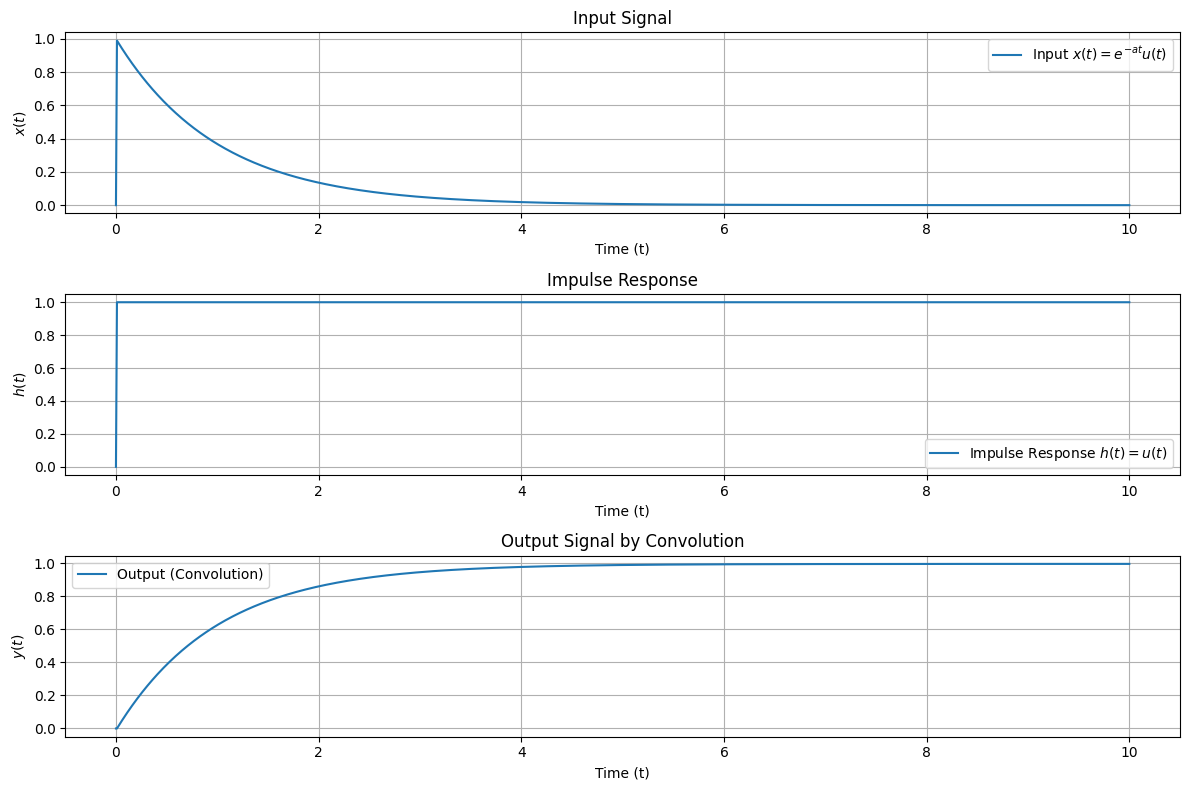

In [7]:
# def main():
#     # Create discrete signals and LTI system
#     discrete_impulse_response = DiscreteSignal([0, 1, 0.5])
#     lti_discrete = LTIDiscrete(discrete_impulse_response)
#     input_signal_discrete = DiscreteSignal([1, 2, 3])

#     # Process the discrete signal
#     output_signal_discrete = lti_discrete.output(input_signal_discrete)
    
#     # Plotting discrete signals
#     input_signal_discrete.plot()
#     output_signal_discrete.plot()

#     # Create continuous signals and LTI system
#     impulse_response_func = lambda t: np.exp(-t) * (t > 0)
#     lti_continuous = LTIContinuous(ContinuousSignal(impulse_response_func))
#     input_signal_func = lambda t: np.sin(t)
#     input_signal_continuous = ContinuousSignal(input_signal_func)

#     # Process the continuous signal
#     output_signal_continuous = lti_continuous.output_approx(input_signal_continuous, 0.1)
    
#     # Plotting continuous signals
#     input_signal_continuous.plot((-10, 10))
#     output_signal_continuous.plot((-10, 10))

# if __name__ == "__main__":
#     main()





# import numpy as np
# import matplotlib.pyplot as plt

# def unit_step(t):
#     return np.where(t >= 0, 1, 0)

# def input_signal(t, a):
#     return np.exp(-a * t) * unit_step(t)

# def impulse_response(t):
#     return lambda x: np.where((x>=0) & (x<delta),1/delta,0)

# def theoretical_output(t, a):
#     return (1 - np.exp(-a * t)) / a * unit_step(t)

# def main():
#     a = 1  # Decay rate for the input signal
#     t = np.linspace(-1, 5, 1000)  # Time vector from -1 to 5 seconds
    
#     x_t = input_signal(t, a)
#     h_t = impulse_response(t)
#     y_t = theoretical_output(t, a)
    
#     plt.figure(figsize=(12, 8))
    
#     plt.subplot(3, 1, 1)
#     plt.plot(t, x_t, label='Input $x(t) = e^{-at}u(t)$')
#     plt.title('Input Signal')
#     plt.xlabel('Time (t)')
#     plt.ylabel('$x(t)$')
#     plt.grid(True)
#     plt.legend()

#     plt.subplot(3, 1, 2)
#     plt.plot(t, h_t, label='Impulse Response $h(t) = u(t)$')
#     plt.title('Impulse Response')
#     plt.xlabel('Time (t)')
#     plt.ylabel('$h(t)$')
#     plt.grid(True)
#     plt.legend()

#     plt.subplot(3, 1, 3)
#     plt.plot(t, y_t, label='Output $y(t) = \\frac{1}{a}(1 - e^{-at})u(t)$')
#     plt.title('Output Signal')
#     plt.xlabel('Time (t)')
#     plt.ylabel('$y(t)$')
#     plt.grid(True)
#     plt.legend()

#     plt.tight_layout()
#     plt.show()

# if __name__ == "__main__":
#     main()

import numpy as np
import matplotlib.pyplot as plt

def unit_step(t):
    return np.where(t > 0, 1, 0)

def input_signal(t, a):
    """ Exponential decay input signal """
    return np.exp(-a * t) * unit_step(t)

def impulse_response(t):
    """ Unit step function as impulse response """
    return unit_step(t)

def convolve_signals(input_sig, impulse_resp, t):
    """ Convolve input signal with the impulse response """
    dt = t[1] - t[0]  # Assume uniform spacing
    y_t = np.zeros_like(t)
    for i in range(len(t)):
        y_t[i] = np.sum(input_sig[:i+1] * impulse_resp[i::-1]) * dt
    return y_t

def delta_function(t, delta):
    return np.piecewise(t, [np.logical_and(t >= 0, t < delta)], [1/delta, 0])

def main():
    a = 1  # Decay constant for the input signal
    t = np.linspace(0, 10, 1001)  # Time vector from 0 to 10 seconds
    
    x_t = input_signal(t, a)
    h_t = impulse_response(t)
    
    # Convolve input signal with the impulse response to get the output signal
    y_t = convolve_signals(x_t, h_t, t)
    
    # Plotting the signals
    plt.figure(figsize=(12, 8))
    
    plt.subplot(3, 1, 1)
    plt.plot(t, x_t, label='Input $x(t) = e^{-at}u(t)$')
    plt.title('Input Signal')
    plt.xlabel('Time (t)')
    plt.ylabel('$x(t)$')
    plt.grid(True)
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(t, h_t, label='Impulse Response $h(t) = u(t)$')
    plt.title('Impulse Response')
    plt.xlabel('Time (t)')
    plt.ylabel('$h(t)$')
    plt.grid(True)
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(t, y_t, label='Output (Convolution)')
    plt.title('Output Signal by Convolution')
    plt.xlabel('Time (t)')
    plt.ylabel('$y(t)$')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
